In [1]:
import pandas as pd
import cv2
import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.utils.np_utils import to_categorical

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input

In [2]:
import os
fresh={}
currentdir = os.getcwd()
filenames = os.listdir(os.path.join(currentdir, "fresh"))
for file in filenames:
  with open(os.path.join("fresh",file), 'rb') as image:
    fresh[file] = cv2.imdecode(np.frombuffer(image.read(), np.uint8), cv2.IMREAD_COLOR)

In [3]:
print(len(fresh))

150


In [4]:
freshimages = list(fresh.values())

In [5]:
for i in range(len(freshimages)):
     freshimages[i]= cv2.resize(freshimages[i], (224,224))

In [6]:
#converting BGR to RGB format
for i in range(len(freshimages)):
    freshimages[i]= cv2.cvtColor(freshimages[i], cv2.COLOR_BGR2RGB)
   

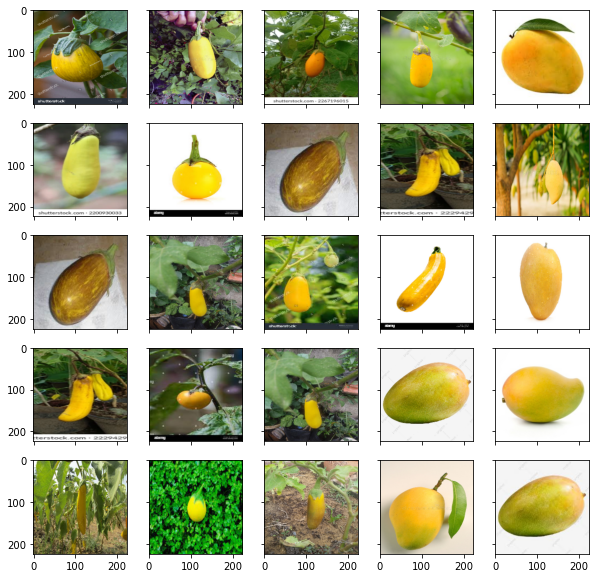

In [7]:
import matplotlib.pyplot as plt
 
fig, axes = plt.subplots(5,5,sharex=True,sharey=True,figsize=(10,10))
for i in range(25):
    axes[i%5][i//5].imshow(freshimages[i*3], cmap="gray")
plt.show()


In [8]:
import os
raw={}
currentdir = os.getcwd()
filenames = os.listdir(os.path.join(currentdir, "raw"))
for file in filenames:
  with open(os.path.join("raw",file), 'rb') as image:
    raw[file] = cv2.imdecode(np.frombuffer(image.read(), np.uint8), cv2.IMREAD_COLOR)

In [9]:
print(len(raw))

151


In [10]:
rawimages = list(raw.values())

In [11]:
for i in range(len(rawimages)):
     rawimages[i]= cv2.resize(rawimages[i], (224,224))

In [12]:
#converting BGR to RGB format
for i in range(len(rawimages)):
    rawimages[i]= cv2.cvtColor(rawimages[i], cv2.COLOR_BGR2RGB)
   

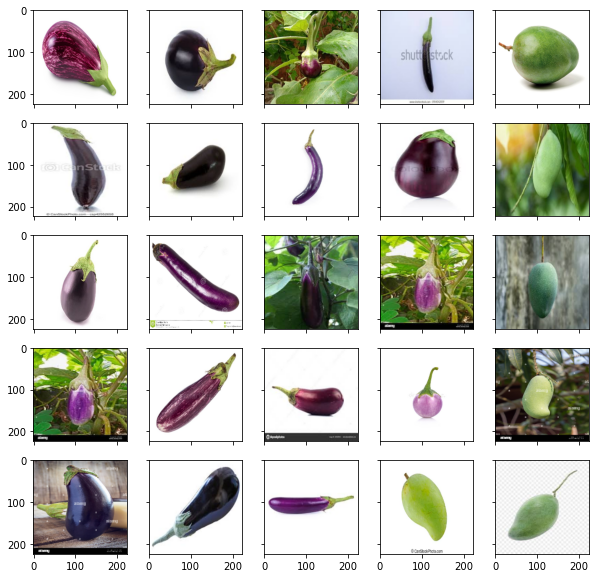

In [13]:
import matplotlib.pyplot as plt
 
fig, axes = plt.subplots(5,5,sharex=True,sharey=True,figsize=(10,10))
for i in range(25):
    axes[i%5][i//5].imshow(rawimages[i*3], cmap="gray")
plt.show()


In [14]:
import os
rotten={}
currentdir = os.getcwd()
filenames = os.listdir(os.path.join(currentdir, "rotten"))
for file in filenames:
  with open(os.path.join("rotten",file), 'rb') as image:
    rotten[file] = cv2.imdecode(np.frombuffer(image.read(), np.uint8), cv2.IMREAD_COLOR)

In [15]:
print(len(rotten))

152


In [16]:
rottenimages = list(rotten.values())

In [17]:
for i in range(len(rottenimages)):
     rottenimages[i]= cv2.resize(rottenimages[i], (224,224))

In [18]:
#converting BGR to RGB format
for i in range(len(rottenimages)):
    rottenimages[i]= cv2.cvtColor(rottenimages[i], cv2.COLOR_BGR2RGB)

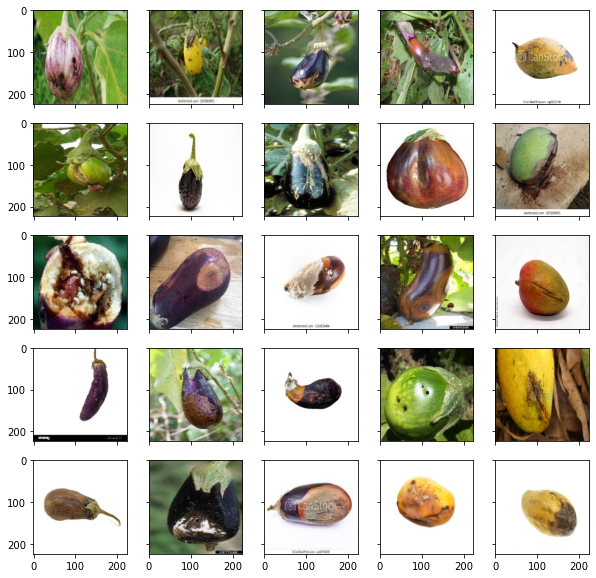

In [19]:
import matplotlib.pyplot as plt
 
fig, axes = plt.subplots(5,5,sharex=True,sharey=True,figsize=(10,10))
for i in range(25):
    axes[i%5][i//5].imshow(rottenimages[i*3], cmap="gray")
plt.show()


In [20]:
train_matrix = []
train_label = []
for key,val in rotten.items():
   train_matrix.append(val.flatten())
   train_label.append(key.split("/")[0])
for key,val in raw.items():
   train_matrix.append(val.flatten())
   train_label.append(key.split("/")[0])
for key,val in fresh.items():
   train_matrix.append(val.flatten())
   train_label.append(key.split("/")[0])
train_matrix=np.array(train_matrix)
train_matrix[0]



C:\Users\K NONIESH REDDY\AppData\Local\Temp\ipykernel_20940\3321555405.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_matrix=np.array(train_matrix)


array([ 45,  82,  56, ...,  45, 168, 124], dtype=uint8)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train1, trainla, test_size = 0.2, random_state = 4)

In [25]:
from keras.models import Sequential
import tensorflow as tf
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, RMSprop, adam
from keras.utils import np_utils
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import random 
from numpy import *
from PIL import Image

In [26]:
print(type(X_train))

<class 'list'>


In [27]:
batch_size = 16
nb_classes =4
nb_epochs = 5
img_rows, img_columns = 200, 200
img_channel = 3
nb_filters = 32
nb_pool = 2
nb_conv = 3
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(4,  activation=tf.nn.softmax)
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, batch_size = batch_size, epochs = nb_epochs, verbose = 1, validation_data = (X_test, y_test))

ValueError: Failed to find data adapter that can handle input: (<class 'list'> containing values of types {'(<class \'list\'> containing values of types {"<class \'numpy.uint8\'>"})'}), (<class 'list'> containing values of types {"<class 'str'>"})

In [ ]:
score = model.evaluate(X_test, y_test, verbose = 0 )
print("Test Score: ", score[0])
print("Test accuracy: ", score[1])

In [ ]:
y_pred= model.predict(X_test)
total=len(y_pred)
sum=0
for i in range(len(y_pred)):
    x1=y_pred[i]
    x2=y_test[i]
    if(x1[0]==x2[0]):
        sum+=1 
acc=(sum/total)*100
print("Accuracy of the model :",acc)